In [1]:
import os, sys
import glob
sys.path.append('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom')
sys.path.append('../')

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from blossom import *
from flowerpot import *

In [ ]:
organism_list = dataset_io.load_organism_dataset('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/organisms_ds0010.txt')
organism_list

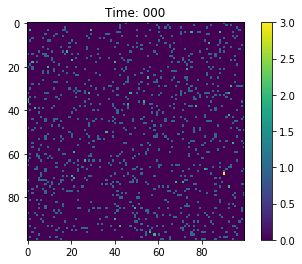

In [8]:
organism_path = '/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/organisms_ds0000.txt'
world_path = '/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/world_ds0000.txt'

import json

with open(organism_path, 'r') as f:
    organism_list = json.load(f)
with open(world_path, 'r') as f:
    world = json.load(f)
    
world_size = world['world_size']
plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

for organism in organism_list:
    if organism['alive']:
        plot[organism['position'][0]][organism['position'][1]] += 1

plt.imshow(plot)
plt.title('Time: %03d' % 0)
# plt.clim(0,10)
plt.colorbar()
plt.savefig('test.png')

alive 0
alive 1
alive 2
alive 3
alive 4
alive 5
alive 6
alive 7
alive 8
alive 9
alive 10
alive 11
alive 12
alive 13
alive 14
alive 15
alive 16
alive 17
alive 18
alive 19
alive 20
alive 21
alive 22
alive 23
alive 24
alive 25
alive 26
alive 27
alive 28
alive 29
alive 30
alive 31
alive 32
alive 33
alive 34
alive 35
alive 36
alive 37
alive 38
alive 39
alive 40
alive 41
alive 42
alive 43
alive 44
alive 45
alive 46
alive 47
alive 48
alive 49
alive 50
alive 51
alive 52
alive 53
alive 54
alive 55
alive 56
alive 57
alive 58
alive 59
alive 60
alive 61
alive 62
alive 63
alive 64
alive 65
alive 66
alive 67
alive 68
alive 69
alive 70
alive 71
alive 72
alive 73
alive 74
alive 75
alive 76
alive 77
alive 78
alive 79
alive 80
alive 81
alive 82
alive 83
alive 84
alive 85
alive 86
alive 87
alive 88
alive 89
alive 90
alive 91
alive 92
alive 93
alive 94
alive 95
alive 96
alive 97
alive 98
alive 99
alive 100
old_age 0
old_age 1
old_age 2
old_age 3
old_age 4
old_age 5
old_age 6
old_age 7
old_age 8
old_age 9


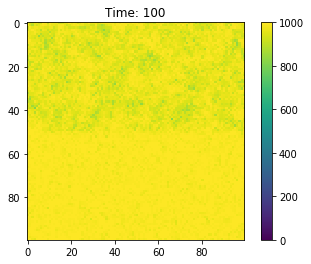

In [16]:
organism_fields = ['alive', 'old_age', 'thirst', 'hunger', 'births']
world_fields = ['water', 'food']
organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/2d/datasets/test_general_2d/world_ds????.txt'))

with open(world_paths[0], 'r') as f:
    world = json.load(f)
    
world_size = world['world_size']

time = 100

for field in organism_fields:
    for i in range(time + 1):
        max_val = 0
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
            
        for organism in organism_list:
            if field == 'alive' and organism['alive'] \
            or field == 'old_age' and organism['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism['cause_of_death'] == 'hunger' \
            or field == 'births' and organism['age'] == 0:
                plot[organism['position'][0]][organism['position'][1]] += 1
                
        for j in plot:
            for i in j:
                if i > max_val:
                    max_val = i
                
    for i in range(time + 1):
        plt.close('all')
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
            
        for organism in organism_list:
            if field == 'alive' and organism['alive'] \
            or field == 'old_age' and organism['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism['cause_of_death'] == 'hunger' \
            or field == 'births' and organism['age'] == 0:
                plot[organism['position'][0]][organism['position'][1]] += 1
        
        fig = plt.figure()
        plt.imshow(plot)
        plt.title('Time: %03d' % i)
        plt.clim(0, max_val)
        plt.colorbar()
        plt.savefig('images/image_2d_%s_%03d.png' % (field, i))
        print(field, i)

for field in world_fields:
    for i in range(time + 1):
        max_val = 0
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]
        
        for j in plot:
            for i in j:
                if i > max_val:
                    max_val = i
        
    for i in range(time + 1):
        plt.close('all')
        
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]

        fig = plt.figure()
        plt.imshow(plot)
        plt.title('Time: %03d' % i)
        plt.clim(0, max_val)
        plt.colorbar()
        plt.savefig('images/image_2d_%s_%03d.png' % (field, i))
        print(field, i)

In [17]:
import imageio

for field in (organism_fields + world_fields):
    filenames = sorted(glob.glob('images/image_2d_%s_???.png' % (field)))
    
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
        
    imageio.mimsave('%s.gif' % field, images, duration=0.1)

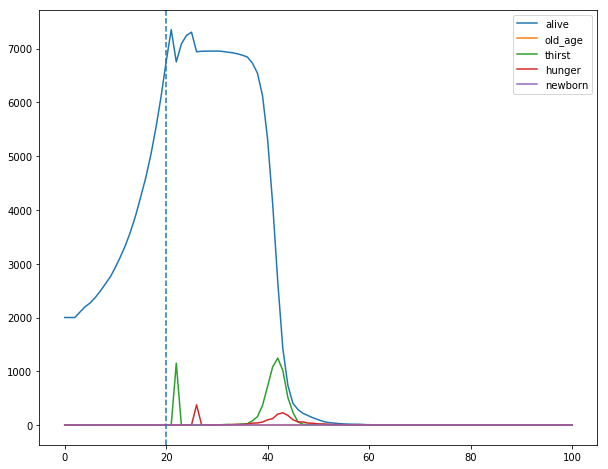

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

organism_fields = ['alive', 'old_age', 'thirst', 'hunger', 'births']
world_fields = ['water', 'food']
organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Personal/Evolution-Code/Code/blossom/scripts/datasets/test_general_2d/world_ds????.txt'))

time = 100

for i in range(time + 1):
    plt.close('all')
    
    fig = plt.figure(constrained_layout=True, figsize=(10,10))
    gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ax00 = fig.add_subplot(gs[0, 0])
    plt.sca(ax00)

    ax10 = fig.add_subplot(gs[1, 0])
    plt.sca(ax10)

    ax11 = fig.add_subplot(gs[1, 1])
    plt.sca(ax11)

    ax20 = fig.add_subplot(gs[2, 0])
    plt.sca(ax20)

    ax21 = fig.add_subplot(gs[2, 1])
    plt.sca(ax21)

    ax22 = fig.add_subplot(gs[2, 2])
    plt.sca(ax22)

    ax01 = fig.add_subplot(gs[0, 1])
    plt.sca(ax01)

    for field in organism_fields:
    
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(organism_paths[i], 'r') as f:
            organism_list = json.load(f)
            
        for organism in organism_list:
            if field == 'alive' and organism['alive'] \
            or field == 'old_age' and organism['cause_of_death'] == 'old_age' \
            or field == 'thirst' and organism['cause_of_death'] == 'thirst' \
            or field == 'hunger' and organism['cause_of_death'] == 'hunger' \
            or field == 'births' and organism['age'] == 0:
                plot[organism['position'][0]][organism['position'][1]] += 1
                
    for field in world_fields:
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]
        
    plt.imshow(plot)
    plt.clim(0,10)
    plt.colorbar()
        
    plt.savefig('images/image_2d_%s_%03d.png' % (field, i))

for field in world_fields:
    for i in range(time + 1):
        plt.close('all')
        
        world_size = [10, 10]
        plot = [[0 for x in range(world_size[1])] for x in range(world_size[0])]

        with open(world_paths[i], 'r') as f:
            world = json.load(f)

        plot = world[field]

        fig = plt.figure()
        plt.imshow(plot)
        plt.clim(0,100)
        plt.colorbar()
        plt.savefig('images/image_2d_%s_%03d.png' % (field, i))